In [1]:
#DecisionTreeclassifier 

#dataset : insurance.csv 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset mobile.csv
df=pd.read_csv("titanic.csv")
#to display first 5 records
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info() #check all details of dataframe df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#check % of null values of rating
df["Age"].isnull().sum()/df.shape[0]*100 #which is less than 20%

19.865319865319865

In [6]:
df.shape

(891, 12)

In [7]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
df["Age"].fillna(df["Age"].mean(),inplace=True)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df["Cabin"].unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
df["Cabin"].isnull().sum()/df.shape[0]*100

77.10437710437711

In [12]:
df.drop("Cabin",axis=1,inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
df.drop("Ticket",axis=1,inplace=True)



In [15]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df["Embarked"].isnull().sum()/df.shape[0]*100

0.22446689113355783

In [18]:
df["Embarked"].fillna("S",inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


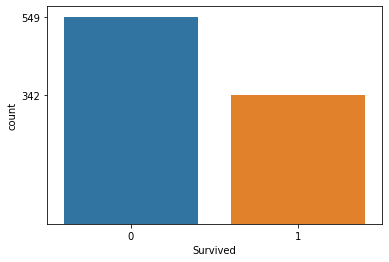

In [20]:
plt.figure()
sns.countplot(data=df,x="Survived")
c=df["Survived"].value_counts()
plt.yticks(c)
plt.show()

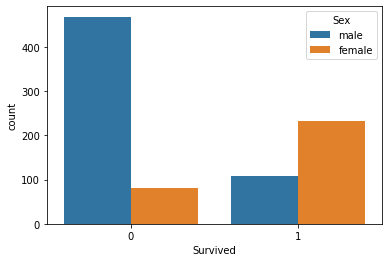

In [21]:
sns.countplot(data=df,x="Survived",hue="Sex")
plt.show()

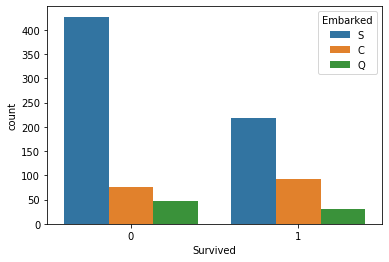

In [22]:
sns.countplot(data=df,x="Survived",hue="Embarked")
plt.show()

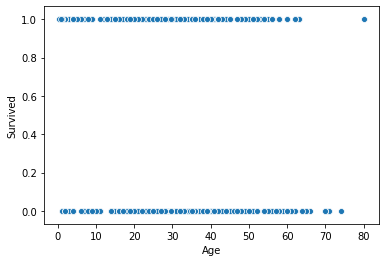

In [23]:
sns.scatterplot(data=df,x="Age",y="Survived")#here x is input and y is output
plt.show()

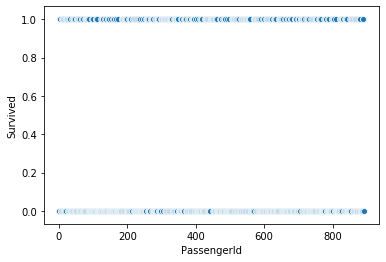

In [24]:
sns.scatterplot(data=df,x="PassengerId",y="Survived")#here x is input and y is output
plt.show()

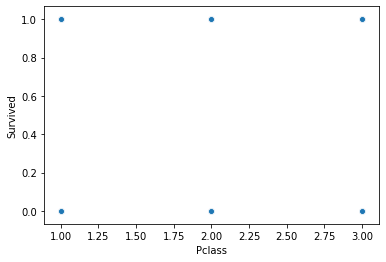

In [25]:
sns.scatterplot(data=df,x="Pclass",y="Survived")#here x is input and y is output
plt.show()

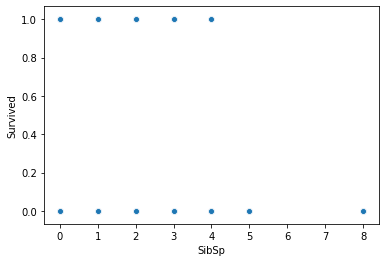

In [26]:
sns.scatterplot(data=df,x="SibSp",y="Survived")#here x is input and y is output
plt.show()

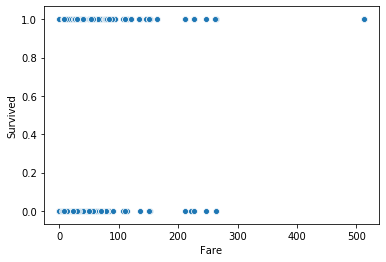

In [27]:
sns.scatterplot(data=df,x="Fare",y="Survived")#here x is input and y is output
plt.show()

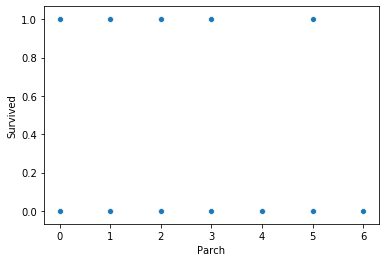

In [28]:
sns.scatterplot(data=df,x="Parch",y="Survived")#here x is input and y is output
plt.show()

In [29]:
df_cat=df.select_dtypes("object")
df_num=df.select_dtypes(["float64","int64"])


In [30]:
from sklearn.preprocessing import LabelEncoder


In [31]:
le=LabelEncoder()

In [32]:
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])
    

In [33]:
df_cat.head()

,Name,Sex,Embarked
0,108,1,2
1,190,0,0
2,353,0,2
3,272,0,2
4,15,1,2


In [34]:
df_new=pd.concat([df_cat,df_num],axis=1)


In [35]:
X=df_new[["Sex","Embarked","SibSp","Fare","Parch"]]
Y=df_new["Survived"]


In [36]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [37]:
#create user defined function
def create_model(model):   #create_model() user defined function and model user defined object
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [39]:
#BaseLine model :  we use classification algorithm : - 1. LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression

In [40]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [41]:
create_model(lr)


              precision    recall  f1-score   support

           0       0.75      0.87      0.81       153
           1       0.78      0.62      0.69       115

    accuracy                           0.76       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268

[[133  20]
 [ 44  71]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
from sklearn.tree import DecisionTreeClassifier  #DecisionTreeClassifier inbuilt class


In [44]:
#create the object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier() # by default GINI Index 

In [45]:
create_model(dt1)

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       153
           1       0.75      0.57      0.65       115

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.72       268
weighted avg       0.74      0.74      0.73       268

[[131  22]
 [ 49  66]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
dt1.feature_importances_

array([0.40078929, 0.0638337 , 0.08236951, 0.37837501, 0.0746325 ])

In [47]:
X.columns

Index(['Sex', 'Embarked', 'SibSp', 'Fare', 'Parch'], dtype='object')

In [48]:
#Here highest reduction :  Sex : 0.40 then Fare =0.37 then SibSp=0.08 then Parch=0.07 
#and Embarked=0.06

In [50]:
from sklearn import tree

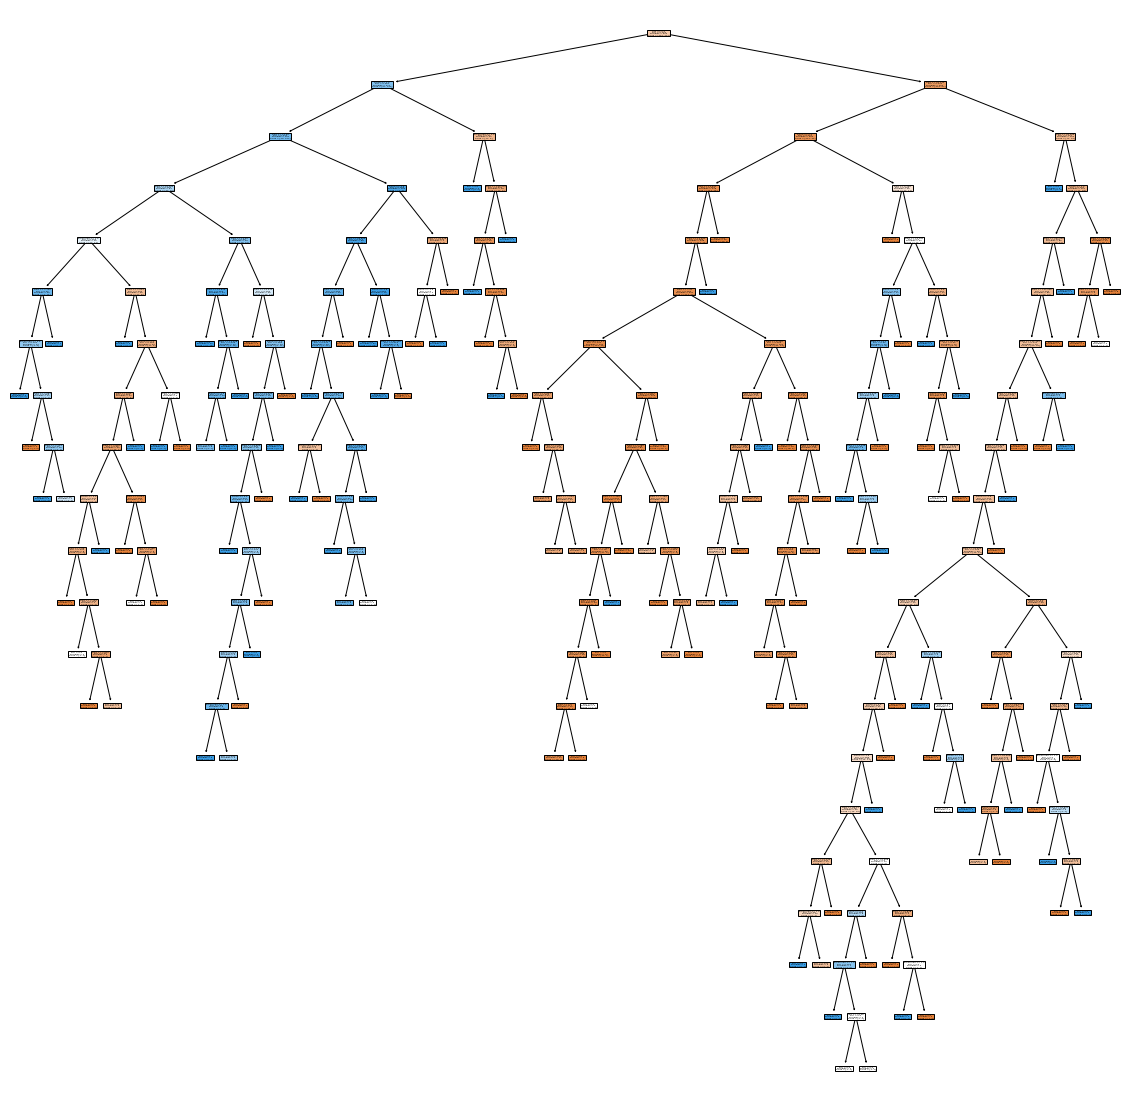

In [51]:
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)


In [52]:
#1. max_depth parameter 
##create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(max_depth=6) #by default Gini index method 
#Note : max_depth can not more than 8

In [53]:
#call function (model train and test)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       153
           1       0.79      0.54      0.64       115

    accuracy                           0.74       268
   macro avg       0.76      0.72      0.72       268
weighted avg       0.75      0.74      0.73       268

[[137  16]
 [ 53  62]]


In [54]:
dt2.feature_importances_

array([0.55042202, 0.04659677, 0.06757899, 0.27205409, 0.06334813])

In [55]:
X.columns

Index(['Sex', 'Embarked', 'SibSp', 'Fare', 'Parch'], dtype='object')

In [56]:
#2nd purning technique : min_samples_leaf
##create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(min_samples_leaf=50) #by default Gini index method 
#min_samples_leaf =50 or more means not less than=50



In [57]:
#call function (model train and test)
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.75      0.84      0.80       153
           1       0.75      0.63      0.69       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268

[[129  24]
 [ 42  73]]


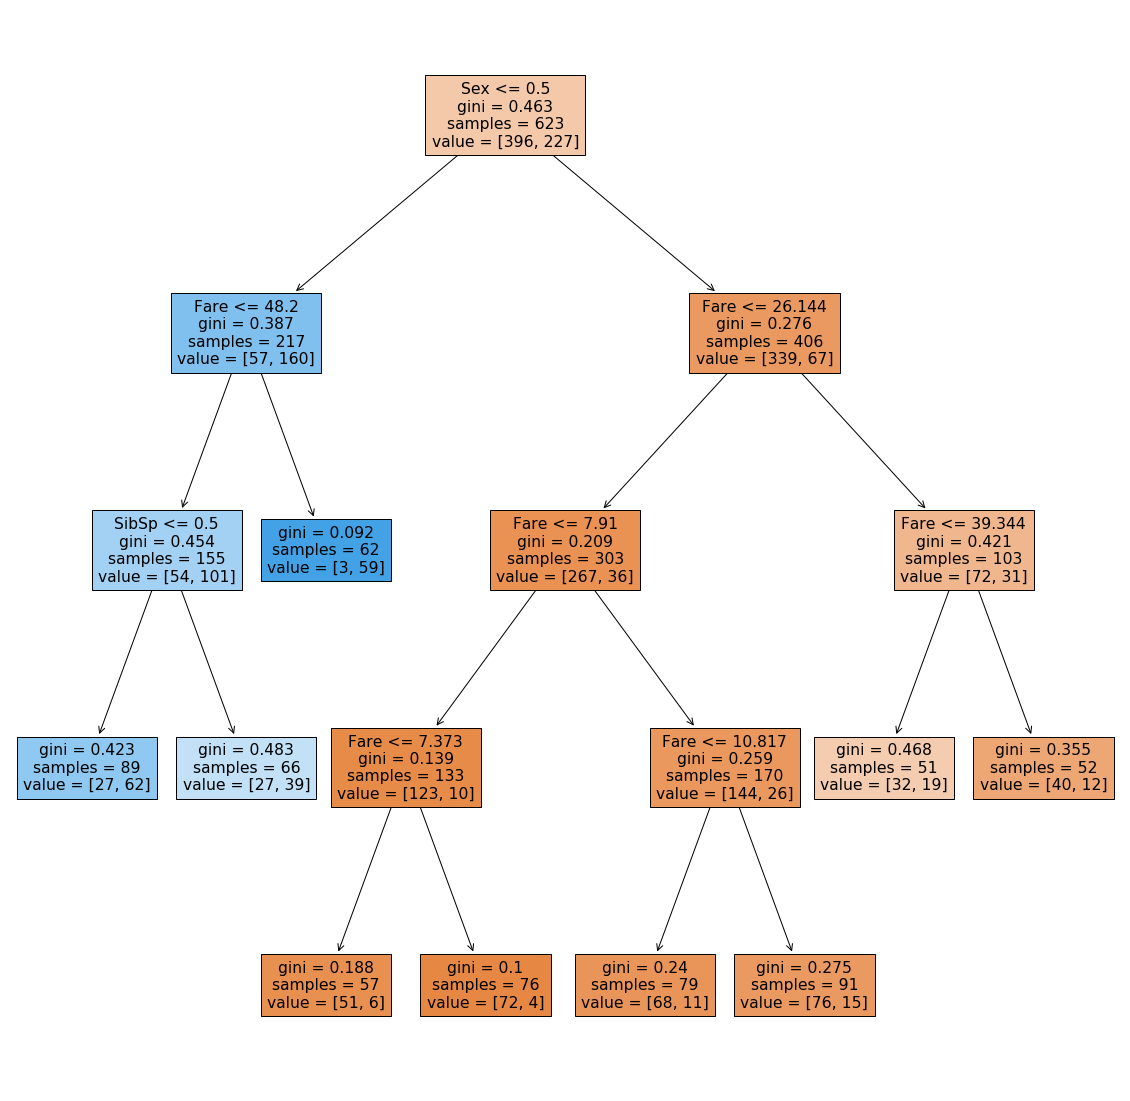

In [58]:
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [59]:
#use entropy method of decisiontree means -P(yes)*log2P(yes)-P(No)log2(P(no))

##create object of DecisionTreeClassifier class
dt4=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50) 

In [60]:
#call function (model train and test)
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.75      0.84      0.80       153
           1       0.75      0.63      0.69       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268

[[129  24]
 [ 42  73]]


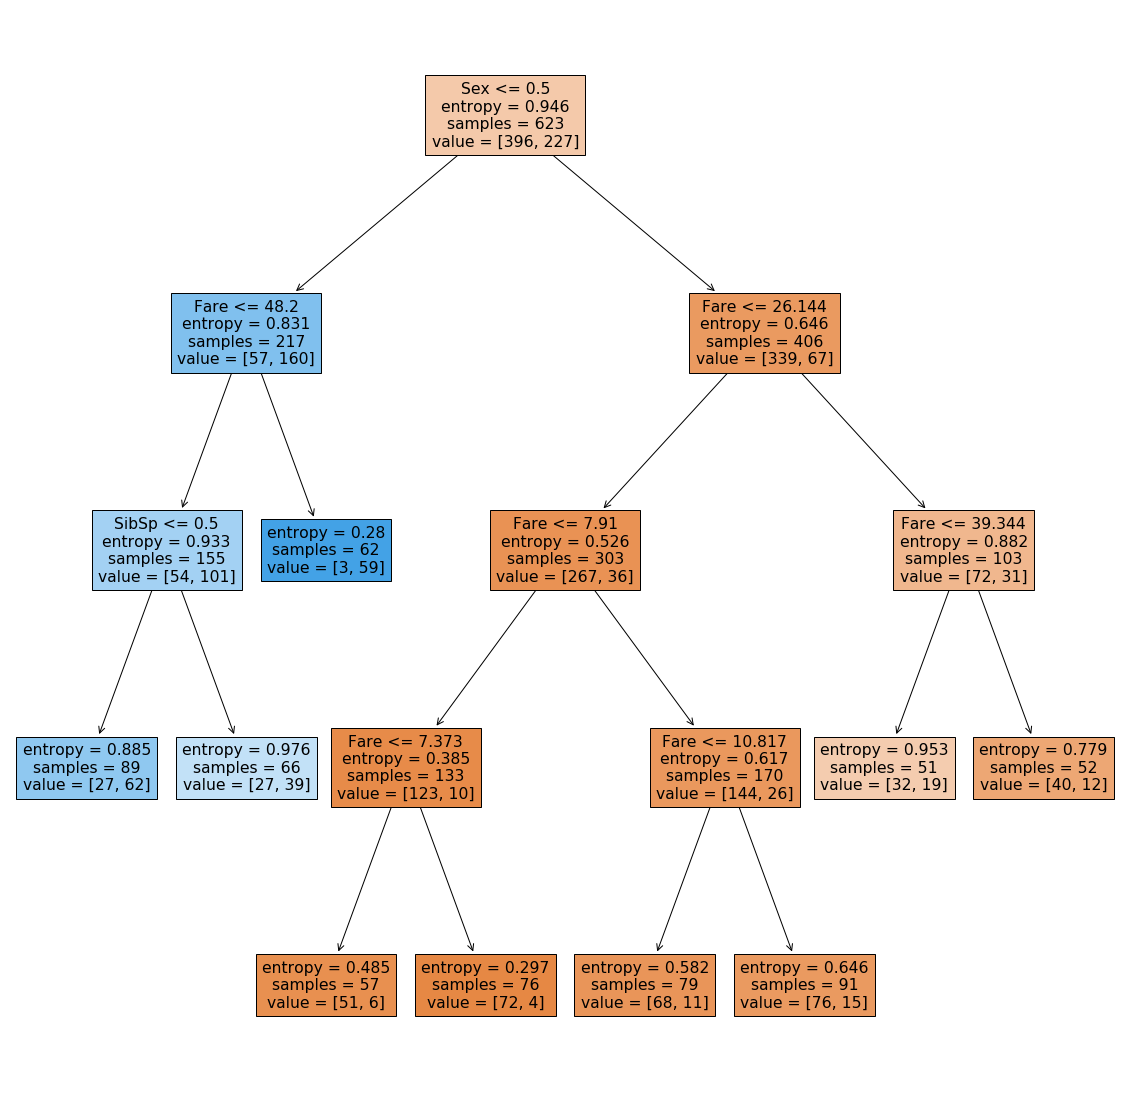

In [61]:
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt4,feature_names=features,filled=True)


In [62]:
#here 63% is the best score
